In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from sklearn.manifold import TSNE
from umap import UMAP

tex_fonts = {
    "text.usetex": True,
    "font.family": "sans-serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

sns.set_theme(context="paper", style="ticks", rc=tex_fonts)

Datei Lesen und in Parteien und Thesen trennen

In [33]:
datensatz = pd.read_csv("F:\Dokumente\wahl-o-mat\wahlomat_datensatz.csv")
datensatz = datensatz.replace({
    "stimme zu": 1, 
    "neutral": 0,
    "stimme nicht zu": -1
    }
)

parteien = datensatz.pivot(
    index="Partei: Kurzbezeichnung",
    columns="These: Titel", 
    values="Position: Position"
)

thesen = datensatz.pivot(
    index="These: Titel",
    columns="Partei: Kurzbezeichnung", 
    values="Position: Position"
)

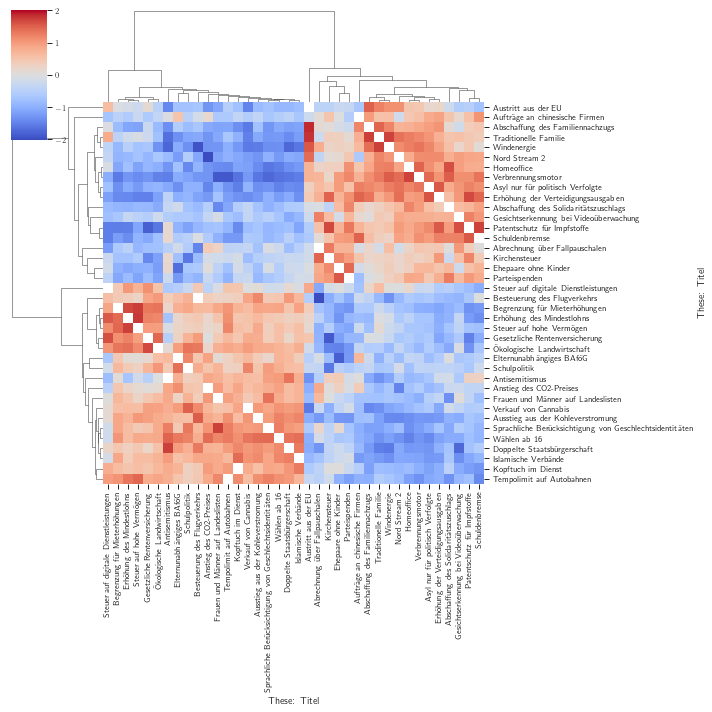

In [97]:
mask = np.identity(38)

sns.clustermap(
    data=parteien.corr(), 
    metric="correlation",
    # method="average",
    cmap="coolwarm",
    row_cluster=True,
    z_score=1,
    mask=mask,
    norm=colors.CenteredNorm(),
)

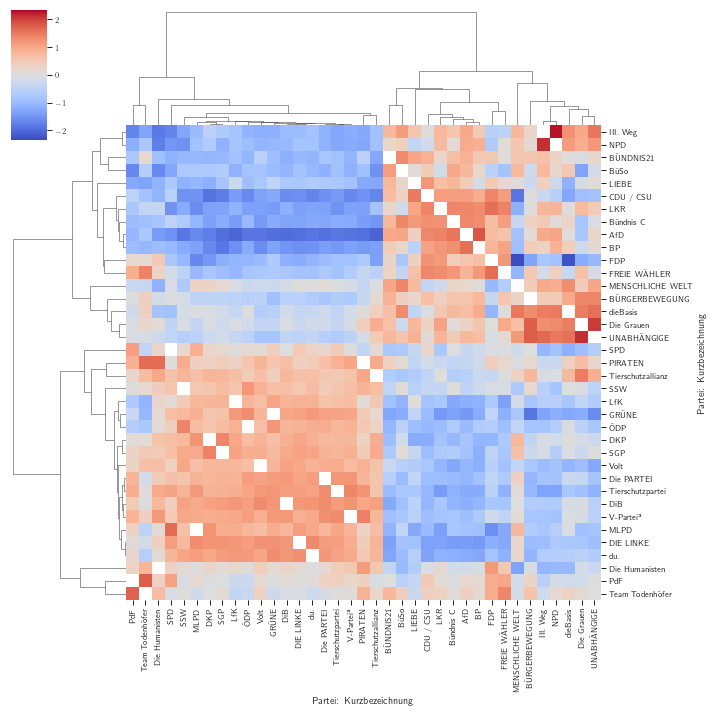

In [129]:
mask = np.identity(37)

sns.clustermap(
    data=thesen.drop("Gesundheitsforschung", axis=1).corr(),
    metric="cosine",
    # method="average",
    cmap="coolwarm",
    z_score=1,
    # standard_scale=1,
    norm=colors.CenteredNorm(),
    mask=mask
)

In [130]:
partei_ordnung = {"DIE LINKE": 0,
     "SPD":2, 
     "Grüne":3, 
     "CDU / CSU":5, 
     "FDP":4, 
     "AfD":6,
     "NPD": 7
}

partien_y = pd.Series(partei_ordnung, index=parteien.index).fillna(3.5)

In [133]:
umap_definition = UMAP(
    densmap=True,
    metric="cosine",
    n_components=2,
    n_neighbors=6,
    target_metric="cosine",
    local_connectivity=2,
).fit_transform(
    X=parteien,
    # y=partien_y
    )

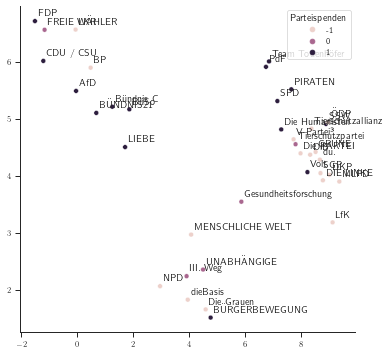

In [134]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=umap_definition[:,0],
    y=umap_definition[:,1],
     hue=parteien.Parteispenden
    # hue=partien_y
)

sns.despine()

for i in range(parteien.shape[0]):
 plt.text(
     x=umap_definition[i,0]+0.1,
     y=umap_definition[i,1]+0.1,
     s=parteien.index[i],
     )